In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# Declare a Base using `automap_base()`
Base = automap_base()

In [7]:

# Use the Base class to reflect the database tables
Base.prepare(engine, reflect=True)


In [8]:
# Print all of the classes mapped to the Base
Base.classes.keys()

['measurement', 'station']

In [9]:
# Assign the classes to variables
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create a session
session = Session(engine)

In [11]:
# Display the row's columns and data in dictionary format
first_row = session.query(Station).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7f9392329f28>,
 'id': 1,
 'elevation': 3.0,
 'latitude': 21.2716,
 'name': 'WAIKIKI 717.2, HI US',
 'longitude': -157.8168,
 'station': 'USC00519397'}

In [12]:
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7f939236a908>,
 'prcp': 0.08,
 'station': 'USC00519397',
 'tobs': 65.0,
 'date': '2010-01-01',
 'id': 1}

In [13]:
# Use the session to query Dow table and display the first 5 trade volumes
for row in session.query(Station.station).limit(10).all():
    print(row)

('USC00519397',)
('USC00513117',)
('USC00514830',)
('USC00517948',)
('USC00518838',)
('USC00519523',)
('USC00519281',)
('USC00511918',)
('USC00516128',)


In [14]:
for row in session.query(Measurement.date).limit(10).all():
    print(row)


('2010-01-01',)
('2010-01-02',)
('2010-01-03',)
('2010-01-04',)
('2010-01-06',)
('2010-01-07',)
('2010-01-08',)
('2010-01-09',)
('2010-01-10',)
('2010-01-11',)


In [15]:
# Total dates
session.query(func.count(Measurement.date)).all()


[(19550)]

In [16]:
# Earliest Date
session.query(Measurement.date).order_by(Measurement.date).first()


('2010-01-01')

In [17]:
# most recent date
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23')

# Exploratory Climate Analysis

In [18]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

In [19]:
# Calculate the date 1 year ago from the last data point in the database
last_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print("Last Year: ", last_year)

Last Year:  2016-08-23


In [20]:
date = dt.datetime(2016, 8, 22)

results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date > date).\
order_by(Measurement.date).all()
results    
# rain = list(np.ravel(results))
# rain

[('2016-08-23', 0.0),
 ('2016-08-23', 0.15),
 ('2016-08-23', 0.05),
 ('2016-08-23', None),
 ('2016-08-23', 0.02),
 ('2016-08-23', 1.79),
 ('2016-08-23', 0.7),
 ('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),

In [21]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results, columns=['date', 'prcp'])
df.set_index('date', inplace=True )
df.head(5)

# Use Pandas Plotting with Matplotlib to plot the data

,prcp
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02


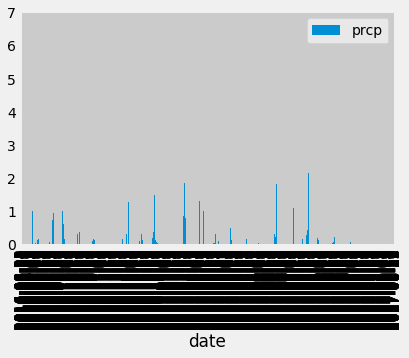

In [40]:
# Use Pandas Plotting with Matplotlib to plot the data
# "labels = ['2016-08-23', '2016-10-01', '2016-11-09', '2016-12-19','2017-01-28', '2017-03-09','2017-04-18', '2017-05-31','2017-07-10']
ax = df.plot.bar()
# ax.tick_params(axis="y", which="y", bottom="off", top="off", labelbottom="off", left="off", right="off", labelleft="on")

plt.show()

In [23]:
# Use Pandas to calculate the summary statistics for the precipitation data
group_summ_df = df.groupby('date').describe()
group_summ_df.head()


prcp                                                       
           count      mean       std   min     25%    50%     75%   max
date                                                                   
2016-08-23   6.0  0.451667  0.706468  0.00  0.0275  0.100  0.5625  1.79
2016-08-24   6.0  1.555000  0.840541  0.08  1.2775  1.800  2.1500  2.28
2016-08-25   7.0  0.077143  0.071813  0.00  0.0300  0.080  0.0950  0.21
2016-08-26   6.0  0.016667  0.016330  0.00  0.0025  0.015  0.0275  0.04
2016-08-27   5.0  0.064000  0.081731  0.00  0.0000  0.020  0.1200  0.18

In [24]:
# Design a query to show how many stations are available in this dataset?
station_list = session.query(Station.station).count()
station_list

9

In [25]:
# or
station_list = session.query(Station.station).all()
station_list

[('USC00519397'),
 ('USC00513117'),
 ('USC00514830'),
 ('USC00517948'),
 ('USC00518838'),
 ('USC00519523'),
 ('USC00519281'),
 ('USC00511918'),
 ('USC00516128')]

In [26]:
# What are the most active stations? (i.e. what stations have the most rows)?
# station_count = session.query(Measurement.station).count()
# station_list
station_count = session.query(Measurement.station, func.count(Measurement.tobs)).group_by(Measurement.station).\
    order_by(func.count(Measurement.tobs).desc()).all()
station_count
# List the stations and the counts in descending order.


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [27]:
# Using the station id from the previous query, calculate the lowest temperature recorded at station USC00519281
low_temp = session.query(func.min(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
low_temp

[(54.0)]

In [28]:
# Using the station id from the previous query, calculate the highest temperature recorded at station USC00519281
high_temp = session.query(func.max(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
high_temp
# highest temperature recorded, and average temperature of the most active station?


[(85.0)]

In [29]:
# Using the station id from the previous query, calculate the average temperature of the most active station
avg_temp = session.query(func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
avg_temp

[(71.66378066378067)]

In [30]:
# Choose the station with the highest number of temperature observations.
date = dt.datetime(2016, 8, 17)

temp_count = session.query(Measurement.tobs).filter(Measurement.date > date).filter(Measurement.station == 'USC00519281').all()
temp_pl = list(np.ravel(temp_count))

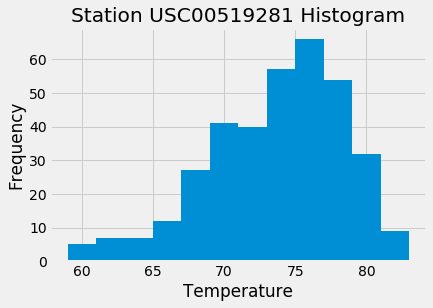

In [31]:
# ax = temp_count
# plt.hist(ax, plt.hist(x, bins=[60,65,70,75,80,85]))
plt.hist(temp_pl, bins=12)
plt.title('Station USC00519281 Histogram')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()


## Bonus Challenge Assignment

In [32]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [33]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [34]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [35]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [36]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [37]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [38]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [39]:
# Plot the daily normals as an area plot with `stacked=False`
